# Volume 1: K-Means Clustering.
    Sam Goldrup
    MATH 345
    18 October 2021

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [3]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        #initialize attributes
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        k = self.n_clusters
        centers = random.choices(X, k=k) #choose random centers

        for i in range(self.max_iter):
            if self.normalize == True:
                centers = centers / (np.linalg.norm(centers,ord=self.p)) # normalize vectors
            assignments = dict() #create a dictionary 
            for j in X:
                m = np.argmin([np.linalg.norm(u - j, ord=self.p) for u in centers]) #take p-norms
                if m in assignments:
                    assignments[m].append(j) #append that row of X
                else:
                    assignments[m] = [j] 
            centers2 = [np.mean(assignments[x], axis=0) for x in range(k)] 
            
            if all([np.linalg.norm(centers[x] - centers2[x]) < self.tol for x in range(k)]): #halt process
                break #if we are within the convergence tolerance (self.tol)
            centers = centers2.copy() 
            
        self.assignments = assignments 
        self.centers = centers
        
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        labels = [None] * len(X)
        for i in range(len(X)):
            point = X[i]
            diffs = [np.linalg.norm(point-c) for c in self.centers] #get differences of pts from center 
            index_of_cluster = np.argmin(diffs) #find index of minimum differnce
            labels[i] = index_of_cluster #assign that index
            
        return labels
    def plot(self, new_lims = False, XMIN = 0., XMAX = 0., YMIN = 0., YMAX = 0., is_sac=False):
        "Will plot the cluster centers as black crosses. Will plot from the assignments dictionary the clusters by color."
        #list of colors and markers to iterate through
        colors = sns.color_palette(n_colors = self.n_clusters)
        markers = ['*','.','x','d','2','^','s','p','+']             #length 9
        
        #making the plot not so dang small
        plt.figure(figsize = (8,6))
        
        #iter will be used to iterate through the list of colors and markers
        iter = 0
        
        #plotting points by cluster and iterating through colors and markers
        #for each key in the assignments dictionary (which represents a cluster group):
        for key in self.assignments:
            
            #the length of a specific key in the assignments dictionary is the number of points associated with that cluster/key
            #so for all points associated with a cluster:
            for j in range(len(self.assignments[key])):
                
                #getting a single point in the cluster/key
                point = self.assignments[key][j]
                
                #plotting the x coord (point[0]) with its y coord (point[1])
                plt.plot(point[0],point[1], color = colors[iter], marker = markers[iter])
                
            #incrementing iter, careful not to go to/passed possible index of 9
            iter = (iter + 1) % 9
            
        #plotting centers with black cross
        #EXPLANATION: the i = 0 and incrementing i is for the sake of labeling the legend with "Means"; if I just do plotting
            #with label="Means", the legend gets multiple "Means" labels in there (one for each center point); therefore,
            #I'm starting an i=0 and doing the label only when i is 0 so that "Means" only shows up once in the legend
            #there's probably a better way to do this, but this is the first thing I thought of and I'm tired
        i = 0
        for point in self.centers:
            if i == 0:
                plt.plot(point[0],point[1],'kP',markersize = 8, label = "Means")
            else:
                plt.plot(point[0],point[1],'kP',markersize = 8)
            i += 1
        plt.legend(loc = 'upper left')
        
        assgn = self.assignments
        #getting domain and range for plot -- Rounding down to nearest int for mins, up for maxes
        #first, list comprehension to get min/max out of all the points in all the keys
        x_min = min([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        #math.floor rounds down to nearest integer 
        x_min = math.floor(x_min)
        
        x_max = max([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        #math.ceil rounds up to nearest integer
        x_max = math.ceil(x_max)
        
        #etc.
        y_min = min([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_min = math.floor(y_min)
        y_max = max([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_max = math.ceil(y_max)
        
        #new limits weren't set
        if not new_lims:
            #labeling and setting domain and range for plot
            plt.xlim([x_min,x_max])
            print("xlim =",[x_min,x_max])
            plt.ylim([y_min,y_max])
            print("ylim =",[y_min,y_max])

        #new limits are set
        else: 
            #labeling and setting domain and range for plot
            plt.xlim([XMIN,XMAX])
            plt.ylim([YMIN,YMAX])
        
        plt.xlabel('First Principle Component')
        plt.ylabel('Second Principle Component')
        if is_sac == True:
            plt.xlabel('longitude')
            plt.ylabel('latitude')
            plt.title('sacramento!')
            
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)

In [4]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

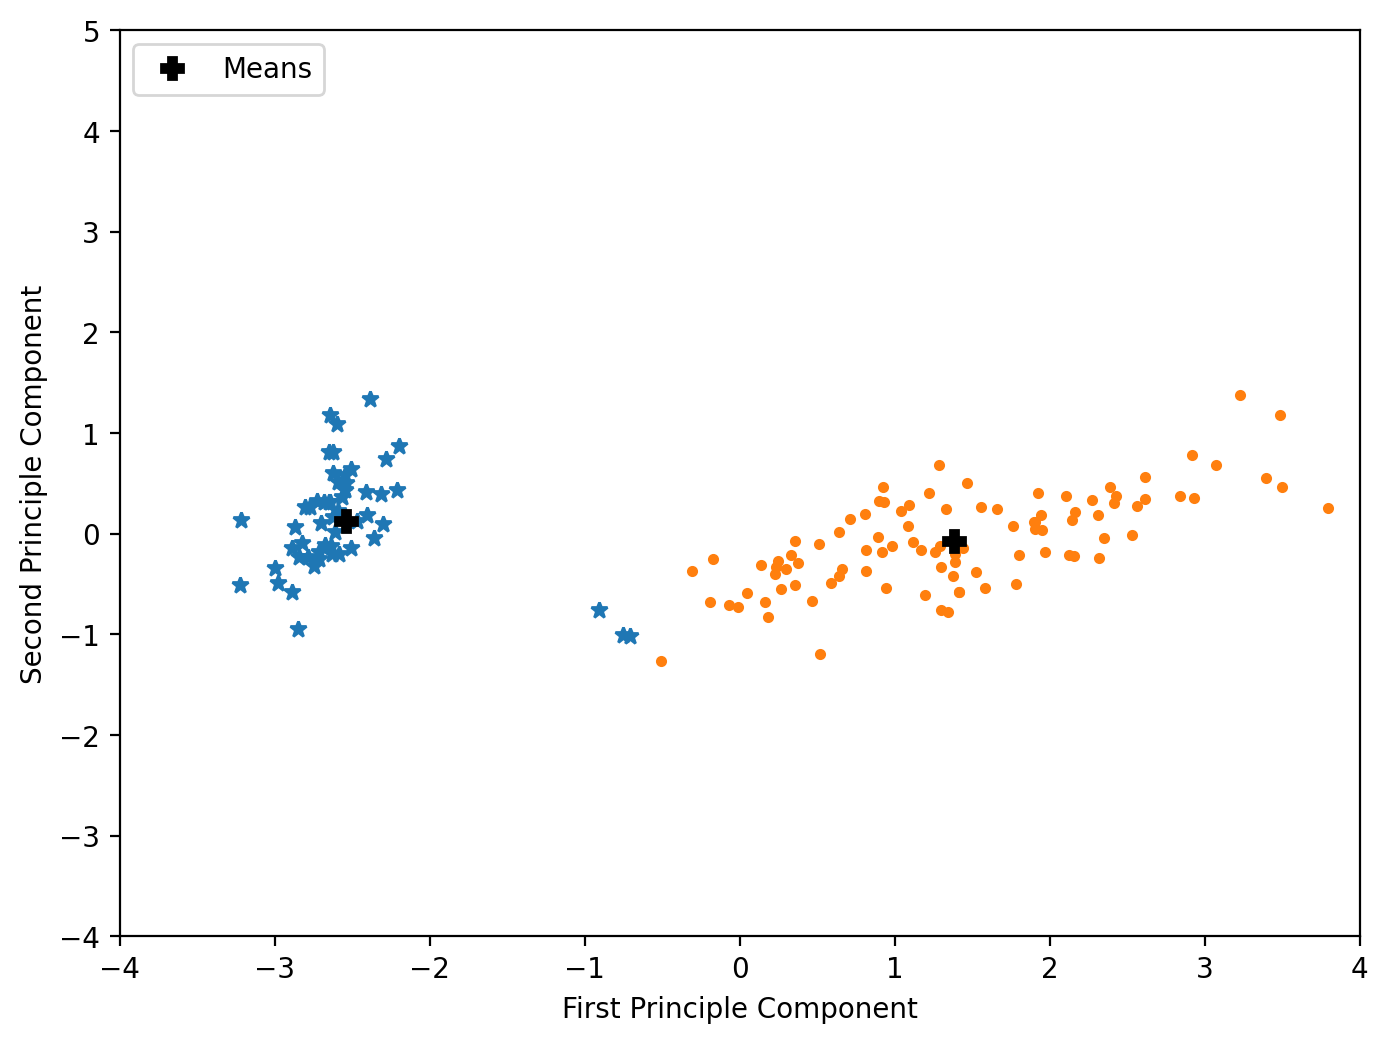

In [5]:
iris_kmeans = KMeans(n_clusters=2) #make a KMeans object
iris_fitting = iris_kmeans.fit(iris_data) #fit data points
iris_kmeans.plot(True,-4,4,-4,5) #plot the means

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

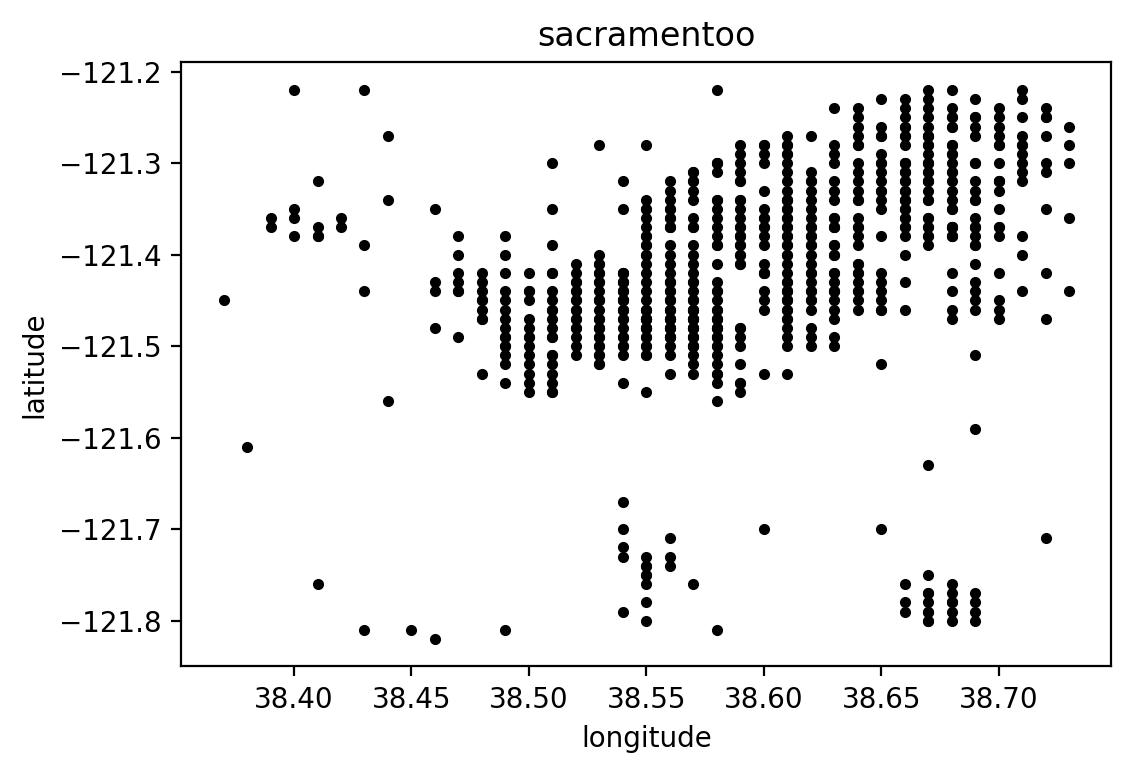

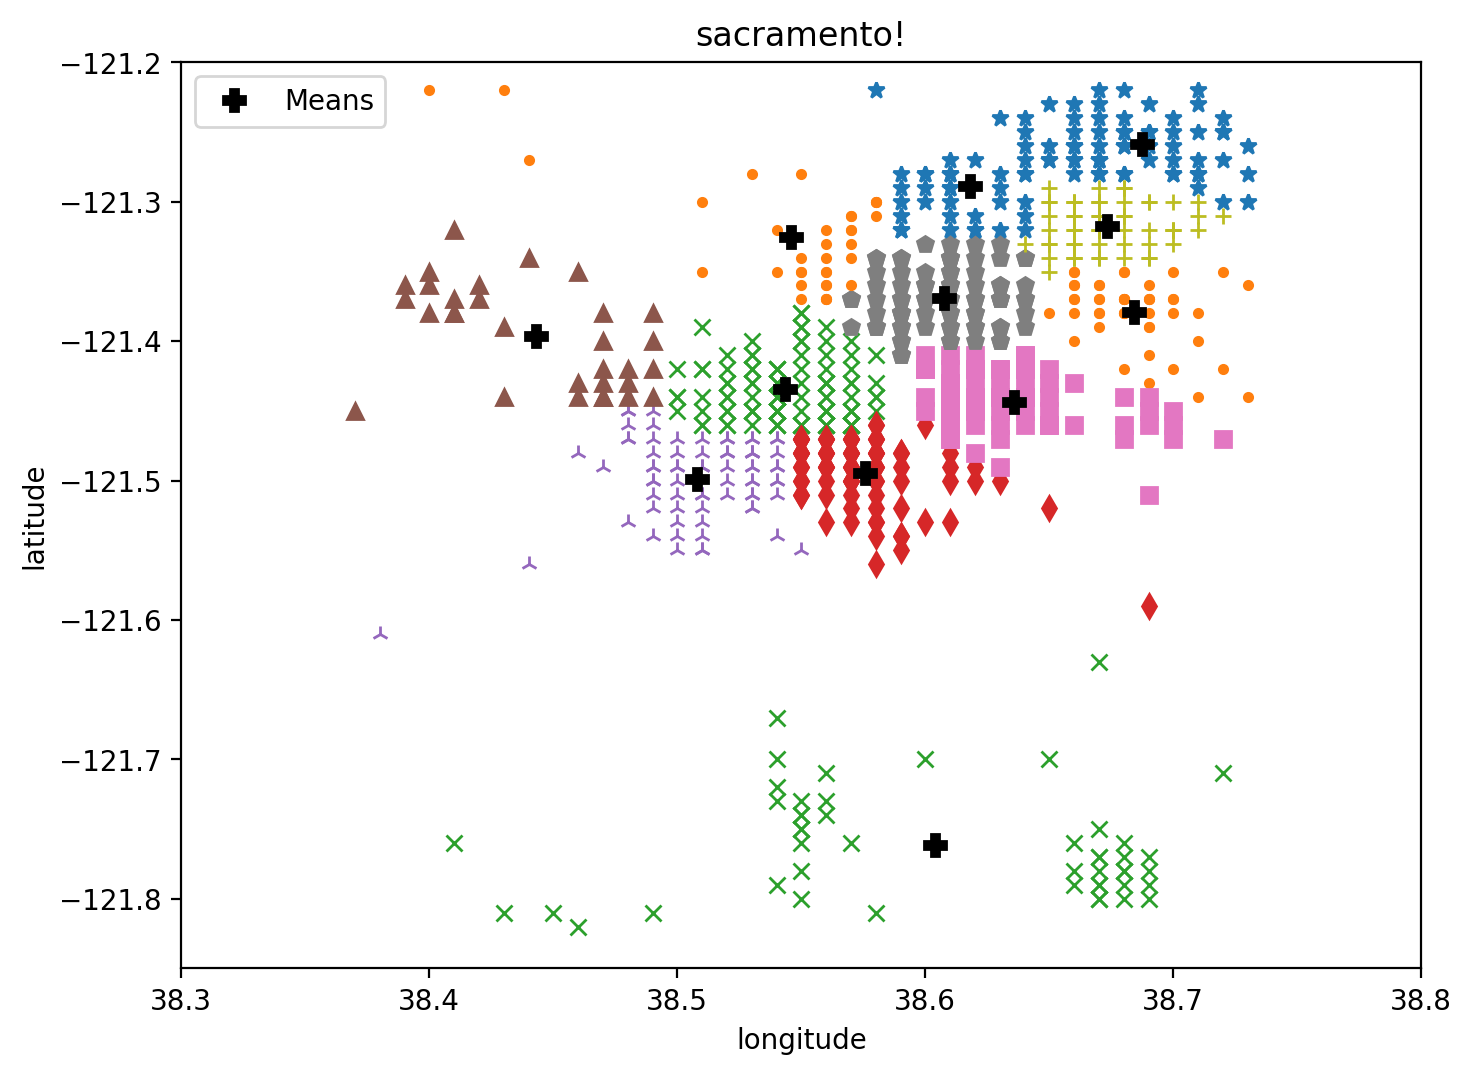

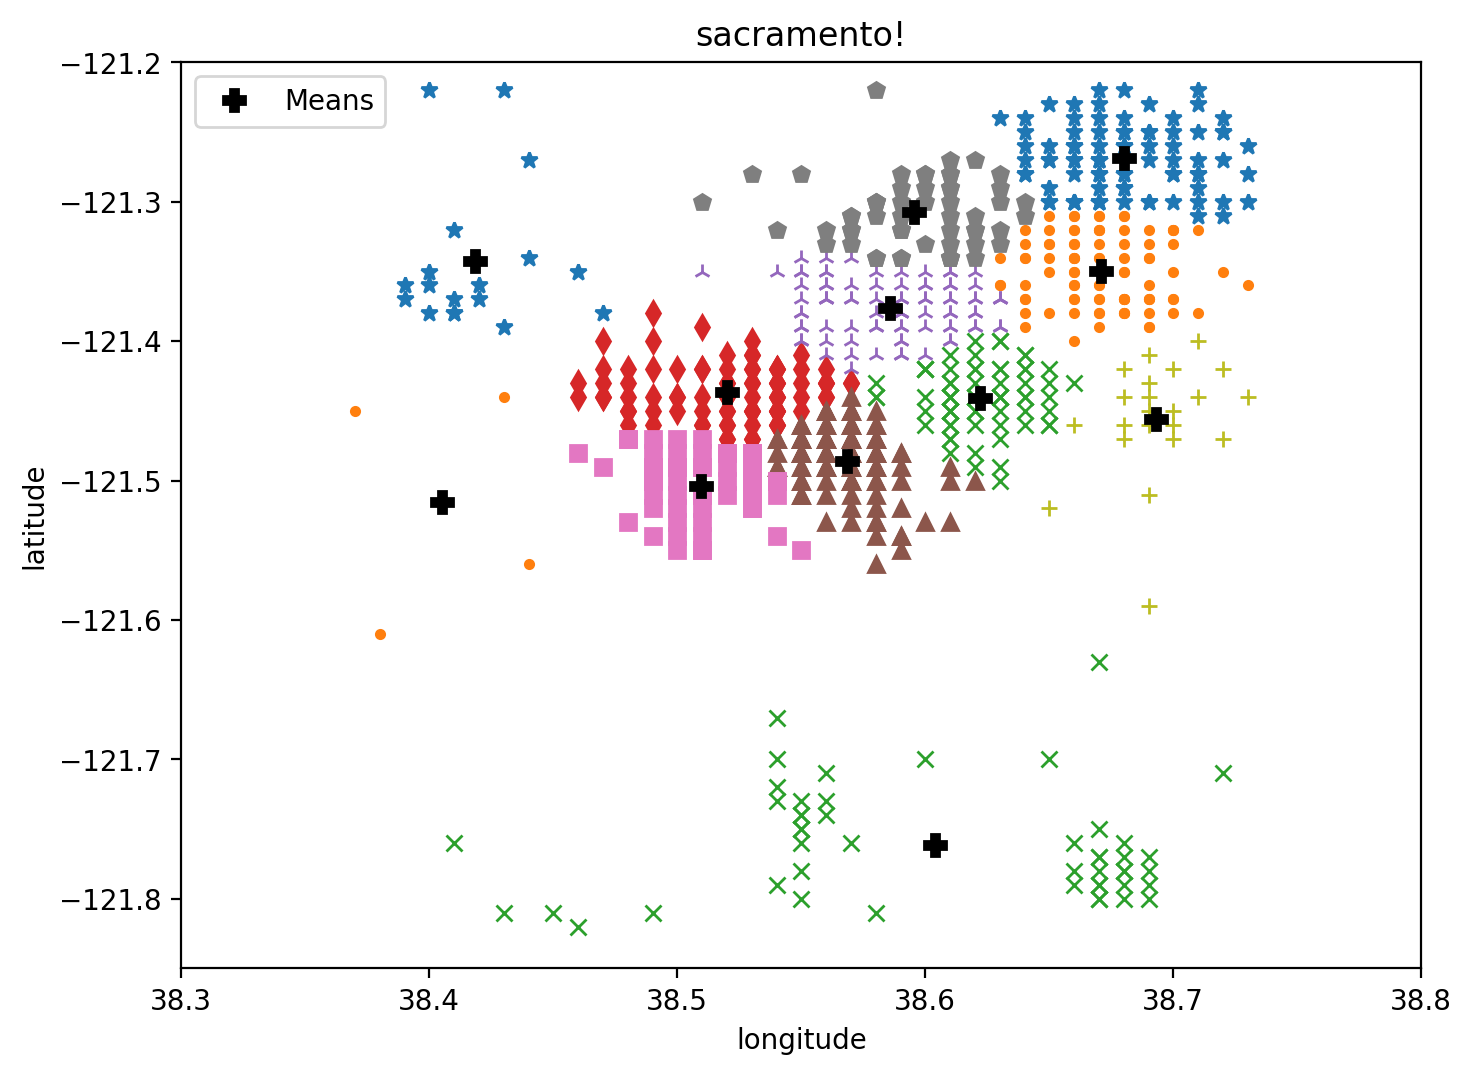

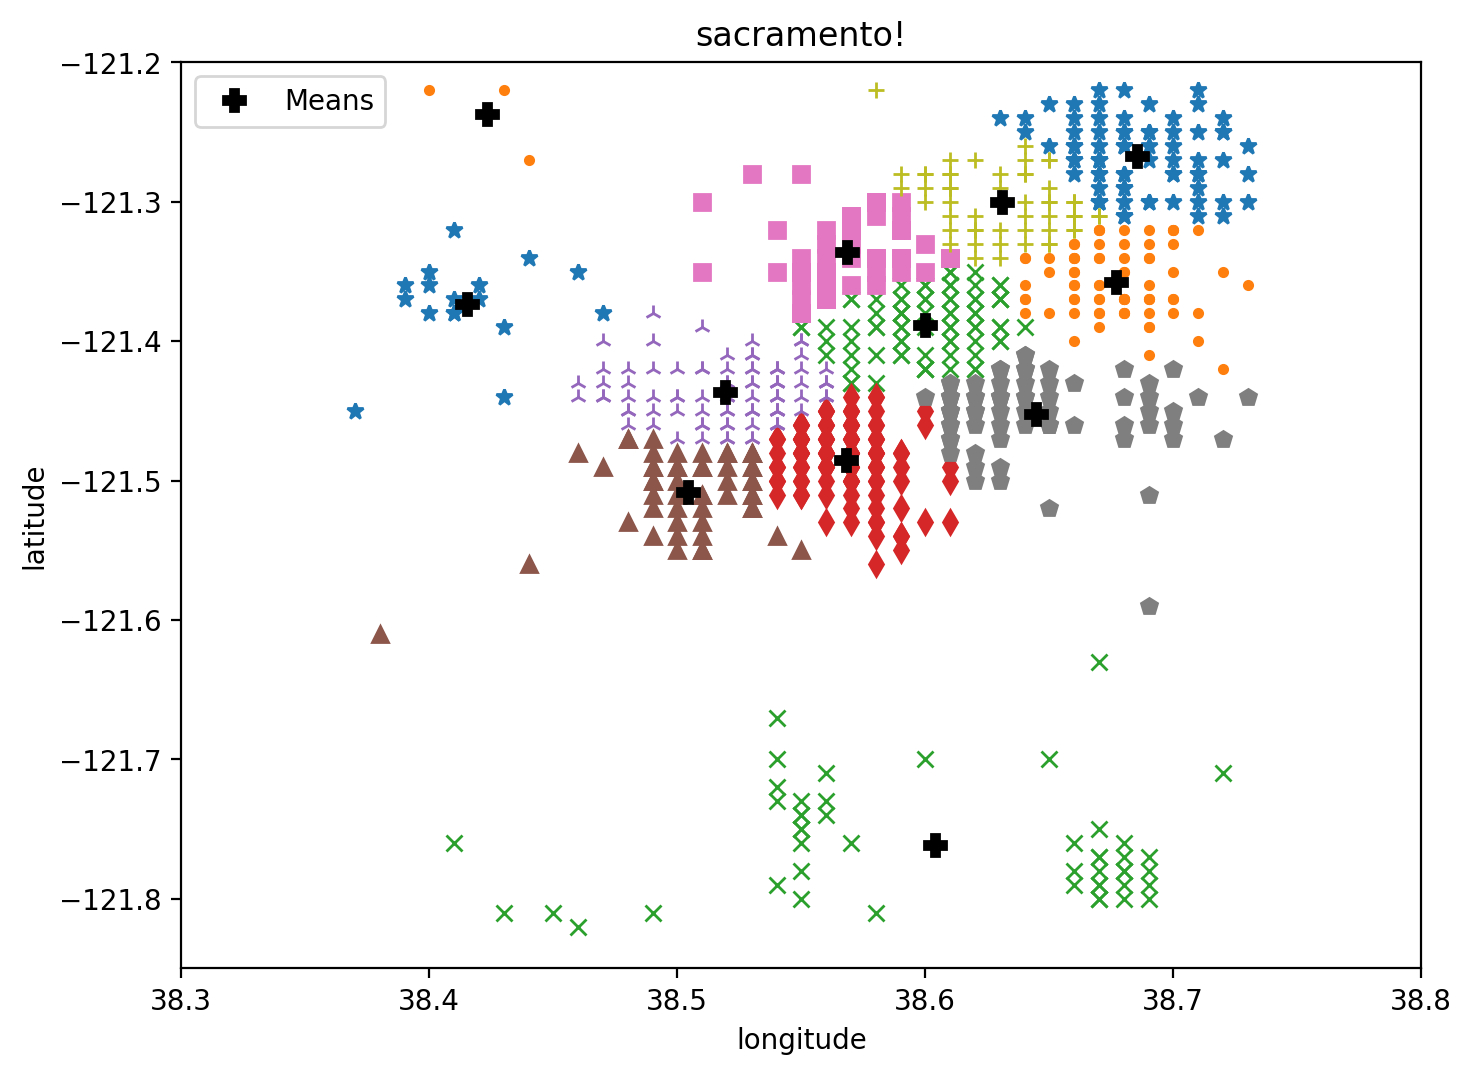

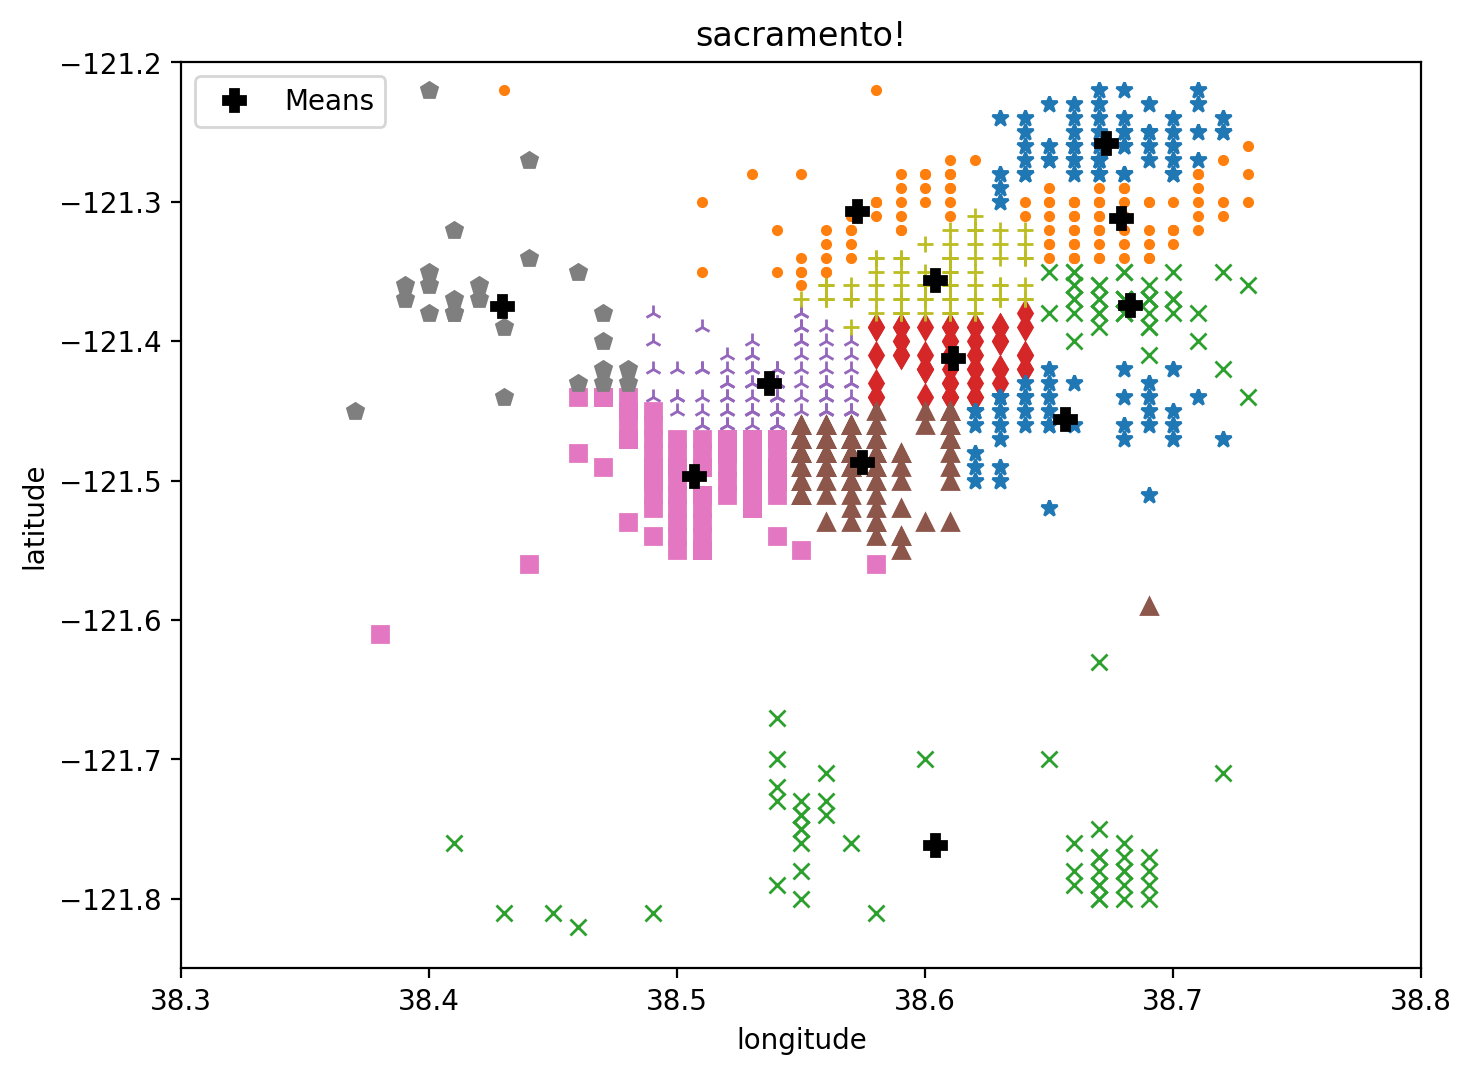

In [6]:
sac = np.load("sacramento.npy")
sac_lat_long = sac[:,-2:]

for point in sac_lat_long:
    plt.plot(point[0],point[1],'k.')
plt.title("sacramentoo")
plt.xlabel("longitude")
plt.ylabel("latitude")

Sac = KMeans(n_clusters = 12, p=np.inf) #infinity-norm
Sac.fit(sac_lat_long)

Sac.plot(True, 38.3,38.8,-121.85,-121.2, is_sac=True)

Sac = KMeans(n_clusters = 12, p=2) #2-norm
Sac.fit(sac_lat_long)

Sac.plot(True, 38.3,38.8,-121.85,-121.2, is_sac=True)

Sac = KMeans(n_clusters = 12, p=3) #3-norm
Sac.fit(sac_lat_long)

Sac.plot(True, 38.3,38.8,-121.85,-121.2, is_sac=True)

Sac = KMeans(n_clusters = 12, p=200) #200-norm
Sac.fit(sac_lat_long)

Sac.plot(True, 38.3,38.8,-121.85,-121.2, is_sac=True)

I think a lot of these norms do the job well. The clustering is different when you choose different values for p. 
I prefer the p=2-norm over the others because it minimizes the distance of all the homes within clusters.

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

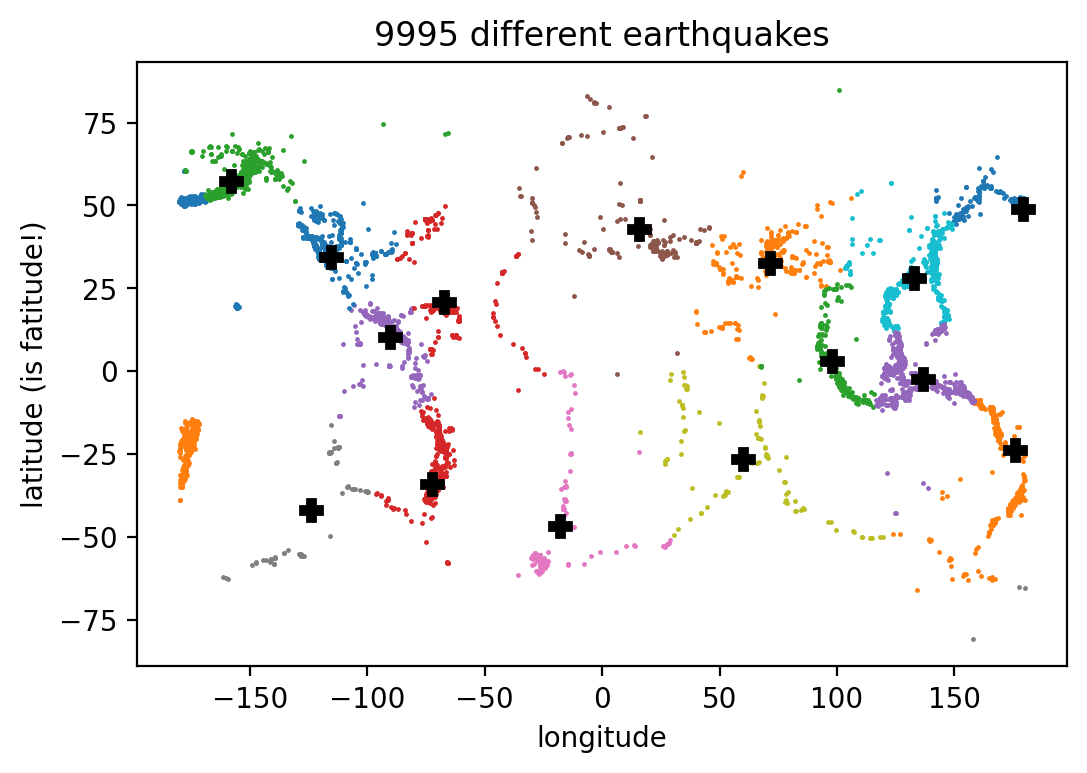

In [7]:
earthq = np.load("earthquake_coordinates.npy")
earthq_lat = earthq[:,1]
earthq_long = earthq[:,0]
earthq_lat_rad = np.deg2rad(90-earthq_lat)
earthq_long_rad = np.deg2rad(earthq_long) #get these lats and longs to radians

earth_x = np.sin(earthq_lat_rad) * np.cos(earthq_long_rad) #convert to euclidean
earth_y = np.sin(earthq_lat_rad) * np.sin(earthq_long_rad)
earth_z = np.cos(earthq_lat_rad)

earth_x = earth_x.reshape((-1,1)) #reshape vectors to make the glorious ass_quake
earth_y = earth_y.reshape((-1,1)) #we will run k-means on ass_quake
earth_z = earth_z.reshape((-1,1))

ass_quake = np.hstack((earth_x, earth_y, earth_z)) #make the ass_quake using horizontal stack

Earth = KMeans(n_clusters = 15, p=2, normalize=True) #make the KMeans object
earth_fitted = Earth.fit(ass_quake) #run the fit function

quakers = earth_fitted.centers #get the centers, call them quakers

#make the cluster centers
theta_list = [] #list of theta values to fill
for i in range(len(quakers)):
    theta_new = np.arctan2(quakers[i][1], quakers[i][0])
    theta_list.append(theta_new)

phi_list = [] #list of phi values to fill 
for i in range(len(quakers)):
    phi_new = np.arccos(quakers[i][2])
    phi_list.append(phi_new)

long_list = [] #list of longitudes to fill
for i in range(len(quakers)):
    long_new = (theta_list[i] * 180) / np.pi
    long_list.append(long_new)
    
lat_list = [] #list of latitudes to fill
for i in range(len(quakers)):
    lat_new = 90 - ((180*phi_list[i])/(np.pi))
    lat_list.append(lat_new)


earth_predicted = Earth.predict(ass_quake) #make predictions on which cluster each pt should go to


for i in range(15):
    plot_list_i = [] #plot_list for each iteration
    thetas = []
    phis = []
    longs = []
    lats = []
    for j in range(len(ass_quake)): #iterate through ass_quake 
        if earth_predicted[j] == i: #if the prediction for the data pt matches the cluster index, add it to plot_list_i
            plot_list_i.append(ass_quake[j]) 
    for k in range(len(plot_list_i)): #convert to thetas, phis using plot_list_i
        theta_new = np.arctan2(plot_list_i[k][1], plot_list_i[k][0])
        phi_new = np.arccos(plot_list_i[k][2])
        thetas.append(theta_new)
        phis.append(phi_new)
    for l in range(len(thetas)): #convert to longs, lats using thetas, phis
        long_new = (thetas[l] * 180) / np.pi
        lat_new = 90 - ((180*phis[l])/(np.pi))
        longs.append(long_new)
        lats.append(lat_new)
    plt.plot(longs, lats, '.', markersize=1.5) #plot the cluster for the given iteration

plt.plot(long_list, lat_list,'kP', markersize = 8) #plot the centers using the lists made in the beginning of this cell
plt.title("9995 different earthquakes")
plt.xlabel("longitude")
plt.ylabel("latitude (is fatitude!)")

plt.show()

# Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [8]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    raise NotImplementedError("Problem 4 Incomplete")